# Preparing Notebook

Installing and importing libraries that will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Column Descriptions

| **Column**      | **Description**                                                                                     |
|------------------|-----------------------------------------------------------------------------------------------------|
| **Model**        | The specific model of the car (e.g., Camry, Accord).                                             |
| **Type**         | The category of the vehicle (e.g., sedan, SUV, hatchback) that indicates its body style.         |
| **Year**         | The model year of the car, representing when the car was manufactured or released.               |
| **Mileage**      | The total distance the car has been driven, usually measured in kilometers or miles.              |
| **Transmission** | The type of transmission system in the car (e.g., automatic, manual) that affects driving dynamics.|
| **Location**     | The geographical area where the car is being sold or registered, which can influence its market value.|
| **CC**           | The engine displacement measured in cubic centimeters (CC), indicating the size of the engine.    |
| **Variant**      | The specific version of the model that may include features, specifications, or design differences.|
| **Price**        | The market price of the car, usually represented in a specific currency (e.g., USD, MYR).        |
| **Origin**       | The country where the car was manufactured or assembled, which can affect brand perception and pricing.|


## Load the dataset

In [2]:
df = pd.read_csv(r'C:\Users\PC\python\car_data.csv', index_col=0)
df

,Model,Type,Year,Mileage,Transmission,Location,CC,Variant,Price,Origin
Title,,,,,,,,,,
*2019 Honda N BOX 660 CUSTOM GL TURBO HONDA,N BOX,4D MPV,2019,35k - 39k,Auto,Selangor,0.7,CUSTOM GL TURBO HONDA SENSING,89700,JAPAN
1997 Honda CIVIC 1.6 EFI (A),CIVIC,4D SEDAN,1997,300k - 349k,Auto,Terengganu,1.6,EFI,20800,MALAYSIA
2016 Honda JAZZ 1.5 (A),JAZZ,4D HATCHBACK,2016,75k - 79k,Auto,Selangor,1.5,S,39800,MALAYSIA
2014 Honda JAZZ 1.5 ONE OWNER CAR KING CONDITION,JAZZ,4D HATCHBACK,2014,120k - 129k,Auto,Selangor,1.5,S,36800,MALAYSIA
1997 Honda CIVIC 1.6 EFI (A),CIVIC,4D SEDAN,1997,400k - 449k,Auto,Perak,1.6,EFI,8500,MALAYSIA
...,...,...,...,...,...,...,...,...,...,...
HONDA CIVIC TYPE R GT 316HP mileage 27000km ONLY!!,CIVIC,4D HATCHBACK,2019,25k - 29k,Auto,Kuala Lumpur,1.5,HATCHBACK HONDA SENSING,249888,JAPAN
2019 Honda CITY 1.5 E (A) TIP TOP CONDITION,CITY,4D SEDAN,2019,85k - 89k,Auto,Melaka,1.5,E,55000,MALAYSIA
ORI2011 Honda INSIGHT 1.3 HYBRID MUGEN ONE OWNER,INSIGHT,4D HATCHBACK,2011,85k - 89k,Auto,Selangor,1.3,(HYBRID),17888,JAPAN


## Exploratory Data Analysis

In [3]:
#Check shape
df.shape

(2072, 10)

In [4]:
#Check variables type
df.dtypes

Model            object
Type             object
Year             object
Mileage          object
Transmission     object
Location         object
CC              float64
Variant          object
Price             int64
Origin           object
dtype: object

##### Realizing mileage and year is not in numerical type, then i have to make changes to that.

In [5]:
# Function to convert mileage ranges and '<' values to numeric
def convert_mileage_range(mileage):
    if isinstance(mileage, str):
        if mileage.startswith('<'):
            return int(mileage.replace('<', '').replace('k', '').strip()) * 1000 - 1  # Just below 4000
        elif ' - ' in mileage:  # Check if the string contains a range
            low, high = mileage.replace('k', '').split(' - ')
            return (int(low) + int(high)) / 2 * 1000  # Convert to actual numbers
        else:
            # Handle cases that don't match expected formats (if needed)
            return None  # or some default value, depending on your needs
    return mileage

# Apply the conversion
df['Mileage'] = df['Mileage'].apply(convert_mileage_range)

# Convert the column to numeric
df['Mileage'] = pd.to_numeric(df['Mileage'])

print(df['Mileage'])

Title
*2019 Honda N BOX 660 CUSTOM GL TURBO HONDA            37000.0
1997 Honda CIVIC 1.6 EFI (A)                          324500.0
2016 Honda JAZZ 1.5 (A)                                77000.0
2014 Honda JAZZ 1.5 ONE OWNER CAR KING CONDITION      124500.0
1997 Honda CIVIC 1.6 EFI (A)                          424500.0
                                                        ...   
HONDA CIVIC TYPE R GT 316HP mileage 27000km ONLY!!     27000.0
2019 Honda CITY 1.5 E (A) TIP TOP CONDITION            87000.0
ORI2011 Honda INSIGHT 1.3 HYBRID MUGEN ONE OWNER       87000.0
2017 Honda CIVIC 1.5 TC-PREMIUM(A)F/SERVICE RECORD     62000.0
2015 Honda CITY 1.5 S+ (A) ANDROID LOW MILEAGE         87000.0
Name: Mileage, Length: 2072, dtype: float64


In [6]:
# Change year from object to int
def clean_year(year):
    if isinstance(year, str):
        if 'or older' in year:
            # Extract the numeric part
            return int(year.split()[0])  # Return just the year part
        else:
            try:
                return int(year)  # Convert to int if it's a valid year
            except ValueError:
                return None  # Return None for invalid entries
    return year  # Return as is if not a string

# Apply the cleaning function
df['Year'] = df['Year'].apply(clean_year)

# Convert to integer type
df['Year'] = df['Year'].astype(int)

In [7]:
#Check dataset description
df.describe()

,Year,Mileage,CC,Price
count,2072.000000,2071.000000,2072.000000,2072.000000
mean,2016.665541,81533.269918,1.674373,70240.799710
std,4.538755,44718.469299,0.276008,49362.441397
min,1995.000000,3999.000000,0.700000,2500.000000
25%,2015.000000,57000.000000,1.500000,41700.000000
50%,2017.000000,82000.000000,1.500000,58800.000000
75%,2019.000000,104500.000000,1.800000,83999.000000
max,2024.000000,424500.000000,3.000000,341700.000000


### Correlation Analysis

In [8]:
# Select only the numeric columns from the DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Display the correlation matrix
print(corr)


             Year   Mileage        CC     Price
Year     1.000000 -0.725908 -0.256806  0.597478
Mileage -0.725908  1.000000  0.186329 -0.575426
CC      -0.256806  0.186329  1.000000  0.080316
Price    0.597478 -0.575426  0.080316  1.000000


## Correlation Analysis Summary

The correlation matrix provides insights into the relationships between the variables: Year, Mileage and Price.

- **Year vs. Mileage (-0.726)**
  - **Negative correlation**: As the **Year** of the car increases , the **Mileage** tends to be lower. Newer cars typically have less mileage.

- **Year vs. Price (0.597)**
  - **Positive correlation**: Newer cars (higher **Year**) tend to have a higher **Price**. This is logical, as newer cars are generally more expensive.

- **Mileage vs. Price (-0.575)**
  - **Negative correlation**: As **Mileage** increases, the **Price** tends to decrease. Cars with higher mileage are typically cheaper due to wear and tear.



### Heatmap correlation between variables.

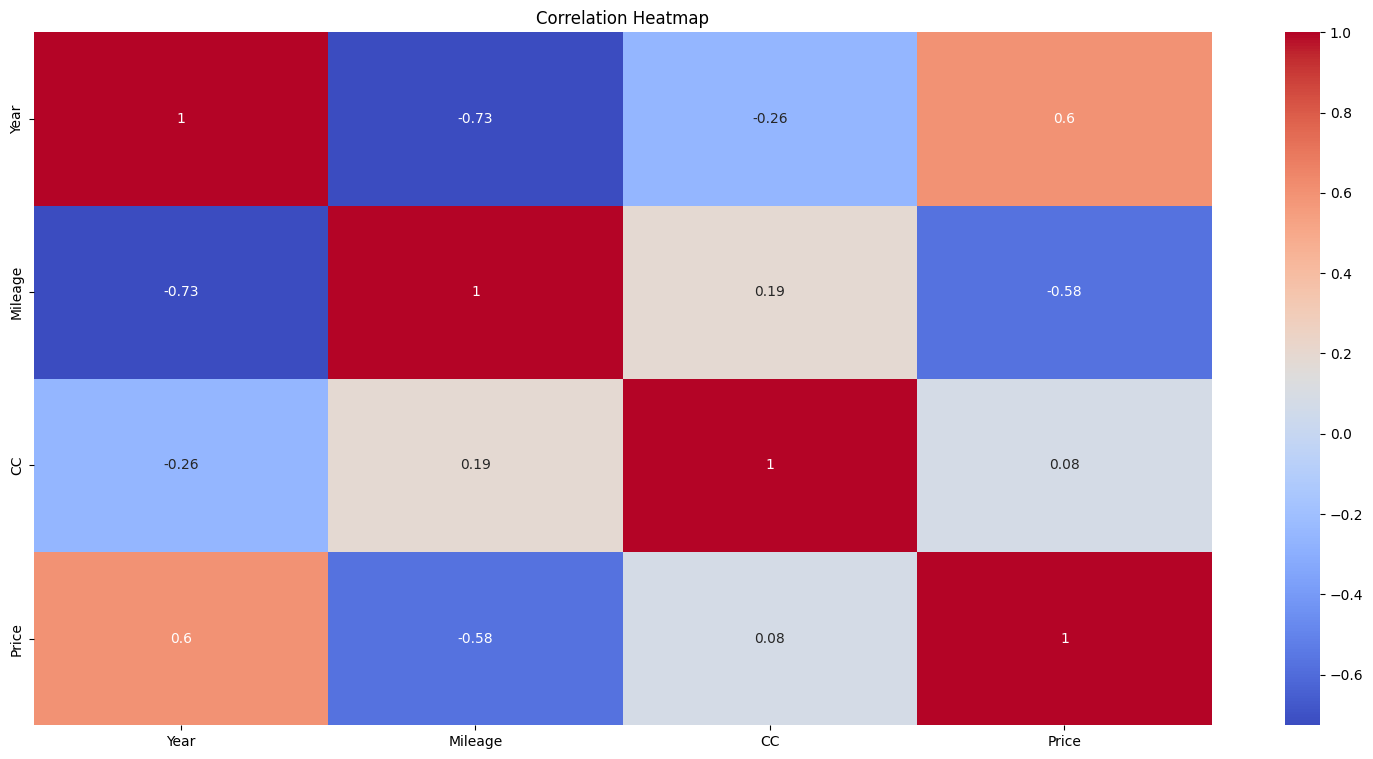

In [9]:
matrix = df_numeric.corr()
plt.figure(figsize=(19,9))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Price Trends by Model and Year (Top 5 Models)

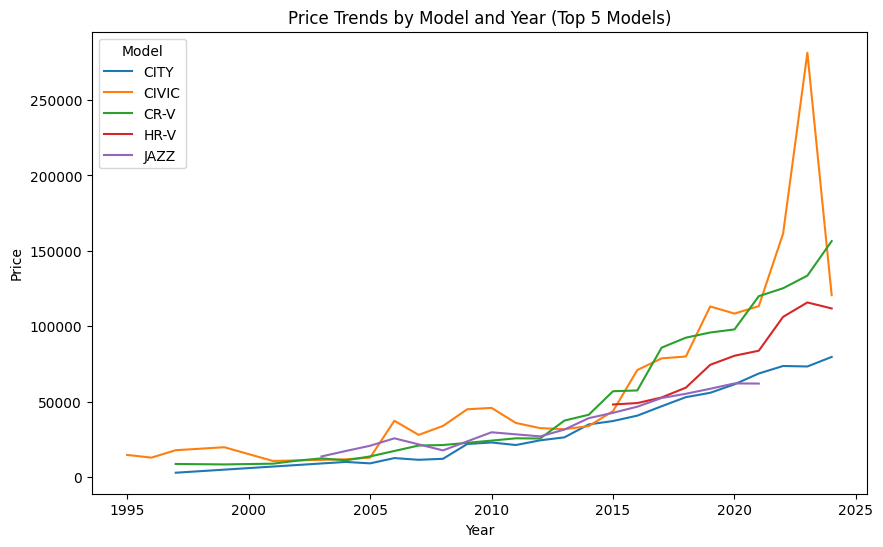

In [11]:
top_5_models = df['Model'].value_counts().nlargest(5).index
filtered_price_trend = price_trend[price_trend['Model'].isin(top_5_models)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_price_trend, x='Year', y='Price', hue='Model')
plt.title('Price Trends by Model and Year (Top 5 Models)')
plt.show()

This plot shows an overall increasing trend in prices across all Honda models. Notably, there is a significant spike in the price of the **Civic** line, which can be attributed to the recent launch of the **Honda Civic Type R** model in 2023.


### Price Distribution Across Location Boxplot

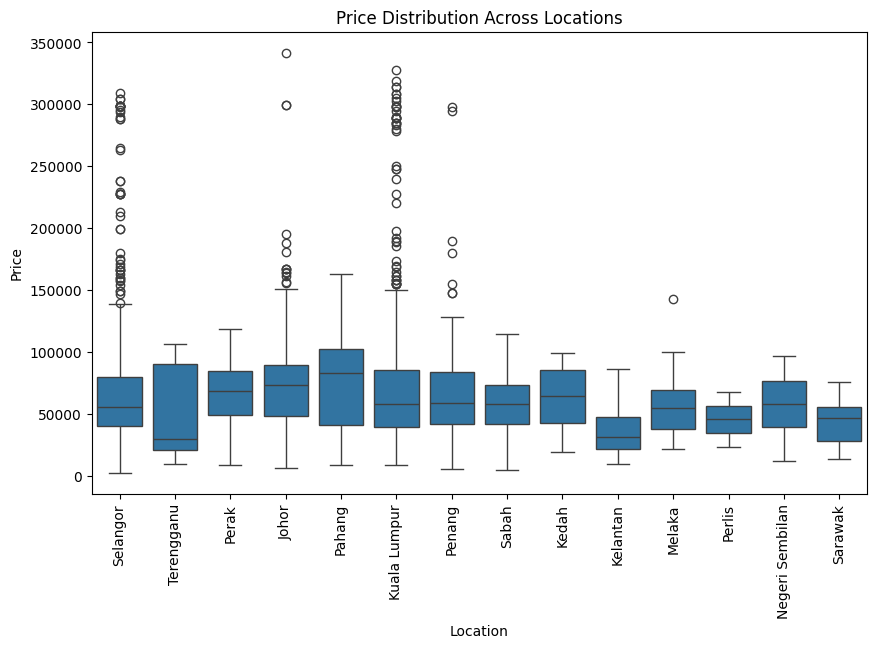

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Price', data=df)
plt.title('Price Distribution Across Locations')
plt.xticks(rotation=90)
plt.show()


### Top 10 Locations for Honda Car Listing Bar PLot

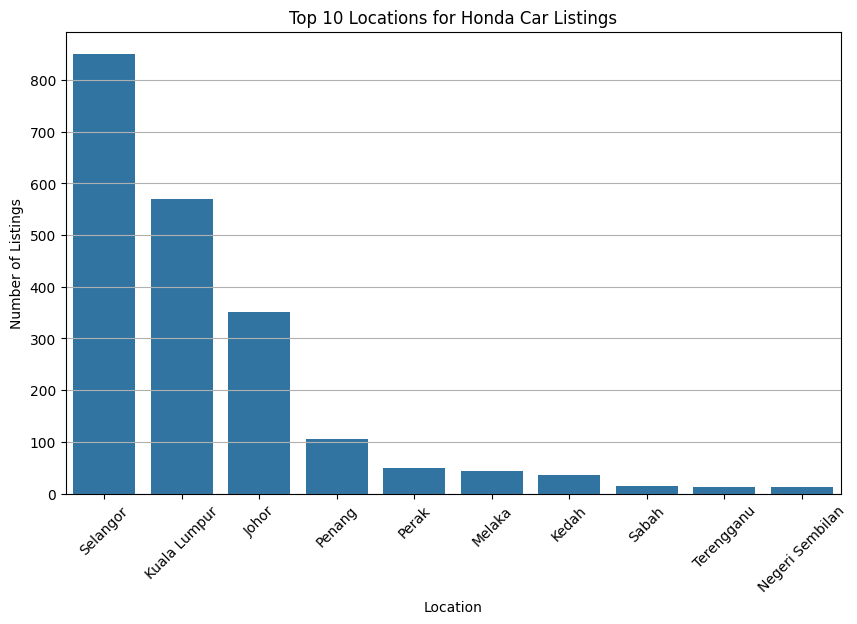

In [23]:
popular_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_locations.index, y=popular_locations.values)
plt.title('Top 10 Locations for Honda Car Listings')
plt.xticks(rotation=45)
plt.ylabel('Number of Listings')
plt.xlabel('Location')
plt.grid(axis='y')  # Optional: Adds a grid for better readability
plt.show()


The bar plot illustrates the top 10 locations where Honda cars are listed for sale, with **Selangor** showing the highest demand in the Honda market, followed closely by **Kuala Lumpur**.


### Top 10 Most Popular Honda Models

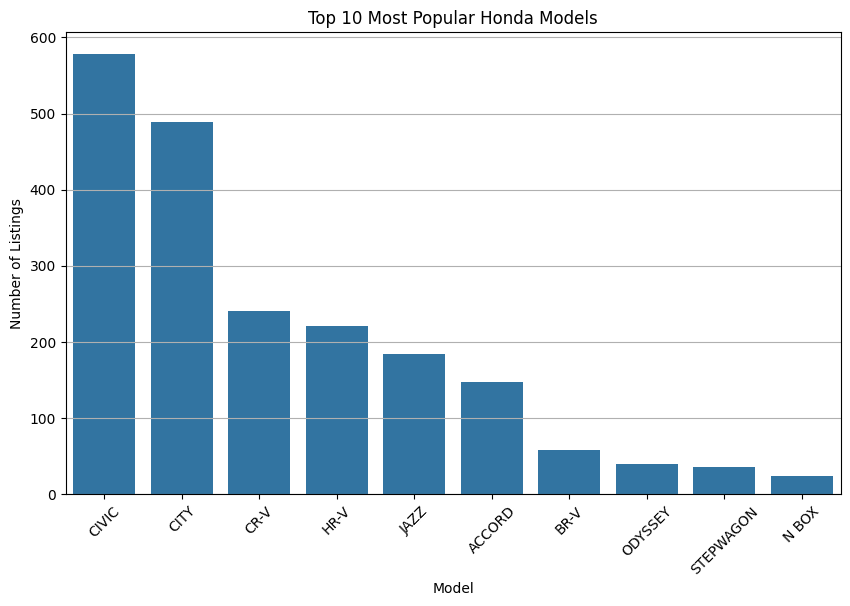

In [25]:
popular_models = df['Model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_models.index, y=popular_models.values)
plt.title('Top 10 Most Popular Honda Models')
plt.xticks(rotation=45)
plt.ylabel('Number of Listings')
plt.xlabel('Model')
plt.grid(axis='y')  # Optional: Adds a grid for better readability
plt.show()

### Honda Average Price by Type

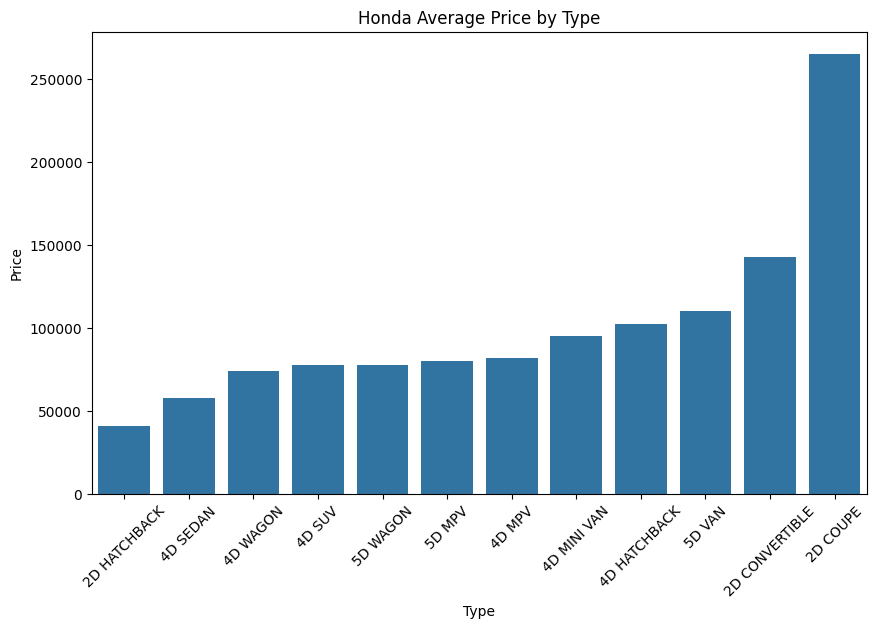

In [27]:
year_price = df.groupby('Type')['Price'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.title("Honda Average Price by Type")
sns.barplot(x=year_price.index, y=year_price.values)
plt.ylabel('Price')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.show()

Overall, the data suggests that consumer preferences for Honda cars vary by type, with 2 Doors Coupe generally commanding higher average prices, while hatchbacks remain more affordable.


#### Scatter Plot Price VS Mileage


<Axes: xlabel='Mileage', ylabel='Price'>

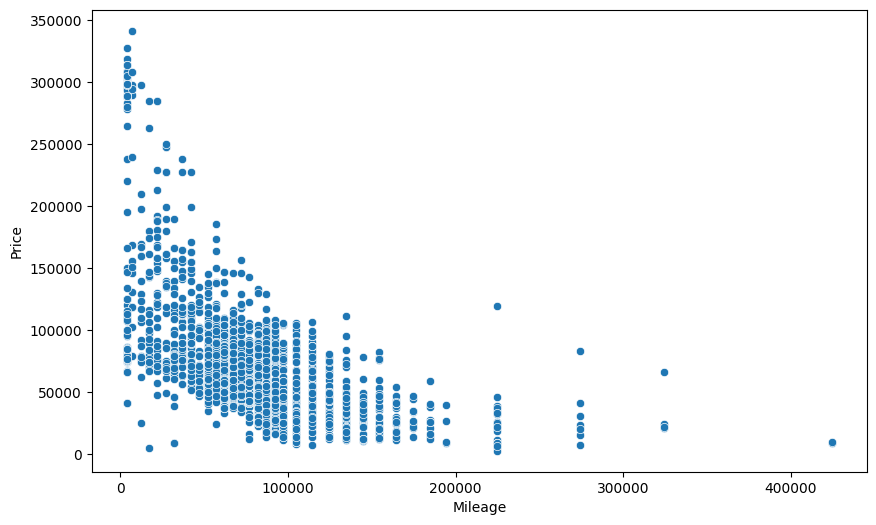

In [44]:
df_numeric = df_numeric.reset_index(drop=True)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_numeric['Mileage'], y=df_numeric['Price'])


 Most of the data points cluster at lower mileage levels with higher prices, suggesting that newer, low-mileage Honda cars are priced significantly higher than those with extensive use.
A few outliers are visible, where certain cars with higher mileage still maintain relatively high prices. These could represent well-maintained vehicles or popular models that retain value better.

Overall, the analysis highlights the inverse relationship between price and mileage for Honda cars, with lower mileage typically commanding higher prices.


### Machine Learning Algorithm - Random Forest Regressor


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [47]:
# Convert categorical variables to numeric
df['Model'] = df['Model'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes

# Drop unwanted column
df = df.drop(['Type', 'Transmission','Variant','Origin'], axis=1)

# Features and target
X = df[['Year', 'Mileage', 'Model', 'Location']]  # Example features
y = df['Price']  # Target variable (car price)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create random forest regressor model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error (RMSE)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 11140.222771935132


- **Root Mean Squared Error (RMSE)**:  
  The RMSE of the model is **11,140.22**, which means that, on average, the model's predictions deviate from the actual car prices by approximately 11,140 units.

- **Percentage Error**:  
  Given that the mean car price in the dataset is **70,000**, the percentage error can be calculated as:
  
  Percentage Error = (RMSE / Mean Price) * 100 = (11,140.22 / 70,000) * 100 ≈ 15.92%
  
  This means that the model's average prediction error is **15.92%** of the mean price.

While this is a decent result, futher improvement could be made by adding more data into dataset.

Text(0, 0.5, 'Predicted Price')

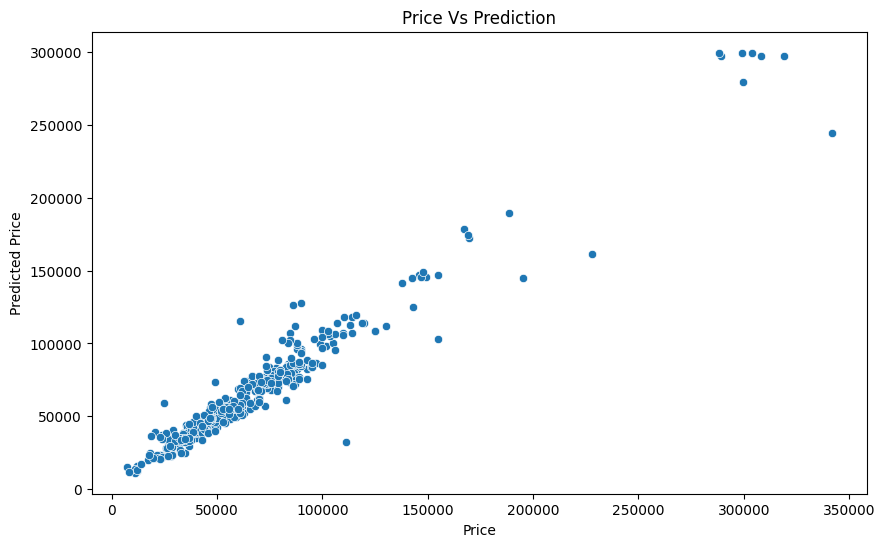

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Price Vs Prediction')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

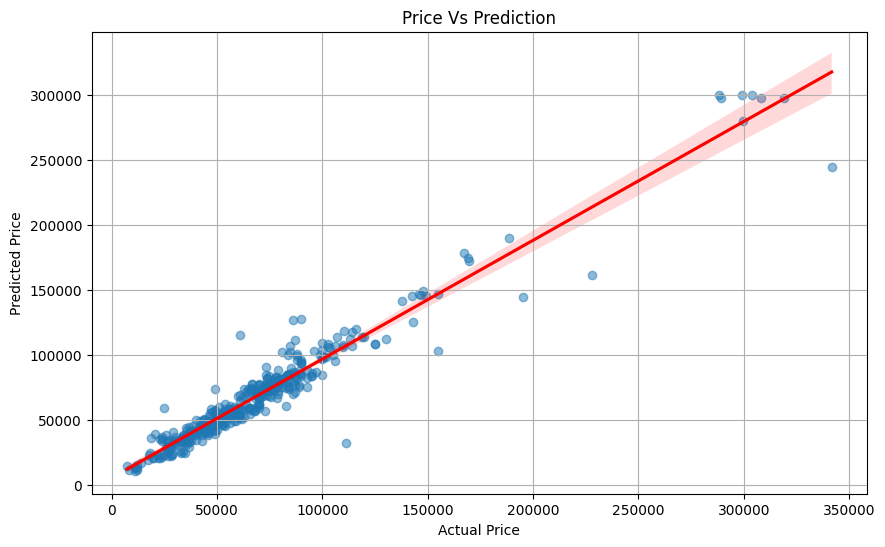

In [49]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Price Vs Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

The scatterplot of prices versus predictions shows a mostly straight line, with a small amount of spread. As they are close to diagonal line (where actual = predicted), it indicates better model's performance.